In [ ]:
import pandas as pd

Loading the excel file

In [ ]:
dfs = pd.read_excel('/content/Distribution_Network_Data.xlsx')

In [ ]:
xc = list(dfs['X'])
yc = list(dfs['Y'])

data cleaning and getting longitude and latitude of each store in order

In [ ]:
yc

[72.6439611285086,
 25.3593730700641,
 50.5648642532894,
 65.4926922540545,
 71.1176072605653,
 67.2743901634899,
 12.2284468976924,
 46.1079951946237,
 19.8891244405433,
 49.206166784107,
 42.0458705004164,
 72.5752467820306,
 69.8632165852765,
 37.1248715385984,
 76.9610339716859,
 86.2753678010589,
 16.5160503087941,
 92.5591094904637,
 57.1376740230397,
 86.5148544660837,
 49.29169136708,
 58.2955216096463,
 42.0535838452666,
 79.6926263050003,
 42.0285954296223,
 nan,
 nan,
 1.0,
 0.0,
 74.0,
 58.0,
 77.0,
 88.0,
 72.0,
 61.0,
 47.0,
 101.0,
 25.0,
 75.0,
 80.0,
 43.0,
 57.0,
 33.0,
 60.0,
 93.0,
 57.0,
 22.0,
 90.0,
 52.0,
 48.0,
 95.0,
 71.0,
 35.0]

In [ ]:
yc=[ 79.6926263050003,
 72.6439611285086,
 25.3593730700641,
 50.5648642532894,
 65.4926922540545,
 71.1176072605653,
 67.2743901634899,
 12.2284468976924,
 46.1079951946237,
 19.8891244405433,
 49.206166784107,
 42.0458705004164,
 72.5752467820306,
 69.8632165852765,
 37.1248715385984,
 76.9610339716859,
 86.2753678010589,
 16.5160503087941,
 92.5591094904637,
 57.1376740230397,
 86.5148544660837,
 49.29169136708,
 58.2955216096463,
 42.0535838452666,

 42.0285954296223,]

In [ ]:
xc

[[19.9906676704456,
  90.8971962770689,
  33.86168368335,
  37.6105020952811,
  14.031734193723,
  2.76790974222021,
  18.6794883893845,
  94.1041534254341,
  52.5421770712729,
  4.36025048478595,
  82.141108510899,
  22.0757382980061,
  10.8797000941924,
  48.039399290203,
  46.7438178442938,
  57.7102187574938,
  32.7323075124292,
  16.7414536355628,
  37.8697820230032,
  75.1446122718255,
  2.11897096450746,
  44.0381681668617,
  45.0885991859118,
  0.435979595346347,
  73.1817470551995]]

In [ ]:
xc=[19.9906676704456,
 90.8971962770689,
 33.86168368335,
 37.6105020952811,
 14.031734193723,
 2.76790974222021,
 18.6794883893845,
 94.1041534254341,
 52.5421770712729,
 4.36025048478595,
 82.141108510899,
 22.0757382980061,
 10.8797000941924,
 48.039399290203,
 46.7438178442938,
 57.7102187574938,
 32.7323075124292,
 16.7414536355628,
 37.8697820230032,
 75.1446122718255,
 2.11897096450746,
 44.0381681668617,
 45.0885991859118,
 0.435979595346347,
 73.1817470551995,]

In [ ]:
import matplotlib.pyplot as plt

Plotting the data extracted from excel file.

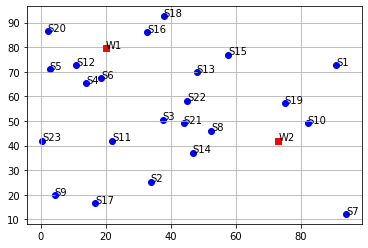

In [ ]:
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.plot(xc[24], yc[24], c='r', marker='s')
plt.scatter(xc[1:24], yc[1:24], c='b')
plt.grid()
annotations=["W1","S1","S2","S3","S4","S5","S6","S7","S8","S9","S10","S11","S12","S13","S14","S15","S16","S17","S18","S19","S20","S21","S22","S23","W2"]
for i, label in enumerate(annotations):
    plt.annotate(label, (xc[i], yc[i]))


n is number of clients 23,


N is set of client[1,2......n]


V is for nodes


A is for arcs


cij is cost of travel over arc ij


Q= capacity of car


q=is the amount needed to be delivered

---



In [ ]:
import numpy as np

In [ ]:
n=23

In [ ]:
N = [i for i in range(1, n+1)]
V = [0] + N
A = [(i, j) for i in V for j in V if i != j]
c = {(i, j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i, j in A}
Q1 = 4
Q2 = 4
q = 1

In [ ]:
pip install gurobipy

In [ ]:
from gurobipy import Model, GRB, quicksum

In [ ]:
mdl = Model('CVRP')

In [ ]:
x = mdl.addVars(A, vtype=GRB.BINARY)
u = mdl.addVars(N, vtype=GRB.CONTINUOUS)

In [ ]:
mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(quicksum(x[i, j]*c[i, j] for i, j in A))

In [ ]:
a=quicksum(x[i, j]*c[i, j] for i, j in A)

In [ ]:
print(a)

<gurobi.LinExpr: 71.25601363963729 <gurobi.Var *Awaiting Model Update*> + 56.07590830581308 <gurobi.Var *Awaiting Model Update*> + 34.04240131512035 <gurobi.Var *Awaiting Model Update*> + 15.399578410827203 <gurobi.Var *Awaiting Model Update*> + 19.239395579556902 <gurobi.Var *Awaiting Model Update*> + 12.487264711432971 <gurobi.Var *Awaiting Model Update*> + 100.22087743507494 <gurobi.Var *Awaiting Model Update*> + 46.771018922963655 <gurobi.Var *Awaiting Model Update*> + 61.8123675056204 <gurobi.Var *Awaiting Model Update*> + 69.2250063978456 <gurobi.Var *Awaiting Model Update*> + 37.704452550486494 <gurobi.Var *Awaiting Model Update*> + 11.561436824613343 <gurobi.Var *Awaiting Model Update*> + 29.72118168773542 <gurobi.Var *Awaiting Model Update*> + 50.2766823694345 <gurobi.Var *Awaiting Model Update*> + 37.81833062000306 <gurobi.Var *Awaiting Model Update*> + 14.34161327977978 <gurobi.Var *Awaiting Model Update*> + 63.260075454024694 <gurobi.Var *Awaiting Model Update*> + 22.027462

In [ ]:
mdl.addConstrs(quicksum(x[i, j] for j in V if j != i) == 1 for i in N)
mdl.addConstrs(quicksum(x[i, j] for i in V if i != j) == 1 for j in N)
mdl.addConstrs((x[i, j] == 1) >> (u[i]+q == u[j]) for i, j in A if i != 0 and j != 0)
mdl.addConstrs(u[i] >= q for i in N)
mdl.addConstrs(u[i] <= Q2 for i in N)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>,
 22: <gurobi.Constr *Awaiting Model Update*

In [ ]:
mdl.Params.MIPGap = 0.1
mdl.Params.TimeLimit = 30  # seconds
mdl.optimize()

Set parameter MIPGap to value 0.1
Set parameter TimeLimit to value 30
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 92 rows, 575 columns and 1104 nonzeros
Model fingerprint: 0x7688105d
Model has 506 general constraints
Variable types: 23 continuous, 552 integer (552 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 1077 rows and 182 columns
Presolve time: 0.06s
Presolved: 1169 rows, 757 columns, 7544 nonzeros
Variable types: 205 continuous, 552 integer (552 binary)
Found heuristic solution: objective 1892.2337415

Root relaxation: objective 3.831131e+02, 94 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Une

In [ ]:
active_arcs = [a for a in A if x[a].x > 0.99]

In [ ]:
print(active_arcs)

[(0, 2), (0, 4), (0, 13), (0, 19), (0, 20), (0, 22), (1, 0), (2, 17), (3, 6), (4, 11), (5, 12), (6, 0), (7, 1), (8, 14), (9, 23), (10, 7), (11, 3), (12, 0), (13, 15), (14, 21), (15, 18), (16, 0), (17, 9), (18, 16), (19, 10), (20, 5), (21, 0), (22, 8), (23, 0)]


As this is a very complex problem we will divide solution into parts to simplify the process of recieving an optimized answer

We will run 4 simulations in total.

1- First simulation will show routes to all shops with starting point W1 and constraint of carrying capacity of 4 (Vans)

2- In the second simulation we set our starting point as warehouse W1 with Vehicle Carrying capacity 
of 16. 

3- In third simulation we set our starting point as warehouse W2 with vehicle carrying capacity of 4. 

4- And in our last simulation we will set our starting point at warehouse W2 with vehicle carrying 
capacity of 16.

Final Result

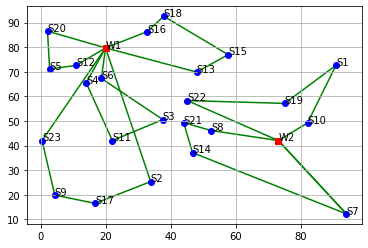

In [ ]:
for i, j in active_arcs:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='g', zorder=0)
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.plot(xc[24], yc[24], c='r', marker='s')
plt.scatter(xc[1:24], yc[1:24], c='b')
annotations=["W1","S1","S2","S3","S4","S5","S6","S7","S8","S9","S10","S11","S12","S13","S14","S15","S16","S17","S18","S19","S20","S21","S22","S23","W2"]
for i, label in enumerate(annotations):
    plt.annotate(label, (xc[i], yc[i]))
plt.grid()

In [ ]:
active_arcs

[(0, 12),
 (12, 5),
 (5, 20),
 (20, 0),
 (0, 6),
 (6, 3),
 (3, 11),
 (11, 4),
 (4, 0),
 (0, 2),
 (2, 17),
 (17, 9),
 (9, 23),
 (23, 0),
 (8, 24),
 (24, 7),
 (8, 21),
 (21, 14),
 (14, 7),
 (7, 24),
 (24, 10),
 (10, 1),
 (1, 19),
 (19, 22),
 (0, 16),
 (16, 18),
 (18, 15),
 (15, 13),
 (13, 0),
 (24, 22)]

In [ ]:
#copying pasting and modifying our arcs
active_arcs=[(0, 12),
 (12,5),
 (5,20),
 (20,0),
 (0,6),
 (6,3),
 (3,11),
 (11,4),
 (4,0),
 (0,2),
 (2,17),
 (17,9),
 (9,23),
 (23,0),
 (8,24),
 (24,7),
 (8,21),
 (21,14),
 (14,7),
 (7,24),
 (24,10),
 (10,1),
 (1,19),
 (19,22),
 (0,16),
 (16,18),
 (18,15),
 (15,13),
 (13,0),
 (24,22)]